In [1]:
# Thời gian dùng để tính toán
start_date='2017-01-01'
end_date='2022-12-30'

In [2]:
import numpy as np
import pandas_datareader as pdr 
import pandas as pd

import yfinance as yf
import re

from dateutil.relativedelta import relativedelta
from pandas_datareader import data as pdr
from datetime import datetime,date

from scipy.optimize import minimize
from scipy.optimize import Bounds

from numpy import random

from vnstock import *

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [4]:
# In dữ liệu trên cùng 1 hàng
pd.set_option('display.expand_frame_repr', False)

Các mã cổ phiếu là:  ['MWG', 'SSI', 'REE', 'FPT', 'VNM', 'HPG', 'DPM', 'CTG']

Lợi nhuận mong muốn trên ngày:  0.00038290943116481817

Lãi suất phi rủi ro trên ngày:
 Năm  Lãi suất
2017  0.000102
2018  0.000089
2019  0.000075
2020  0.000026
2021  0.000013
2022  0.000078


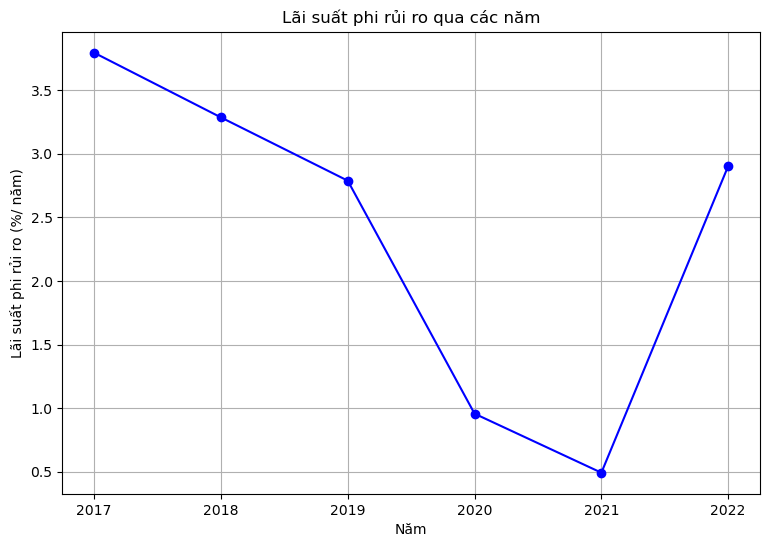

In [5]:
# Danh sách tài sản và số lượng tài sản
name_assets_lst = ['MWG', 'SSI', 'REE', 'FPT', 'VNM', 'HPG', 'DPM', 'CTG']
num_assets = len(name_assets_lst)

# Lợi nhuận mong muốn trên năm
ERp = 0.15
ERp = np.log(1+ERp)/365  #đổi về theo ngày

# Lãi suất phi rủi ro
# Đường dẫn đến tệp Excel
du_lieu_luan = 'C:/Users/Admin/luận dữ liệu.xlsx'
# Đọc tệp Excel và tạo DataFrame
r_f = pd.read_excel(du_lieu_luan, sheet_name='Lsprr')

# Vẽ biểu đồ
plt.figure(figsize=(9, 6))  # Kích thước của biểu đồ
plt.plot(r_f['Năm'], r_f['Lãi suất'], marker='o', linestyle='-', color='b')
plt.title('Lãi suất phi rủi ro qua các năm')
plt.xlabel('Năm')
plt.ylabel('Lãi suất phi rủi ro (%/ năm)')
plt.grid(True)

r_f['Lãi suất'] = np.log(1+r_f['Lãi suất']/100)/365  #đổi về theo ngày

#In kết quả
print('Các mã cổ phiếu là: ',name_assets_lst)
print('\nLợi nhuận mong muốn trên ngày: ',ERp)
print('\nLãi suất phi rủi ro trên ngày:')
print(r_f.to_string(index=False))

In [6]:
pd.set_option('display.max_rows', 4 * 2 + 1)

In [7]:
# Danh sách tài sản và số lượng tài sản
name_assets_lst = ['MWG', 'SSI', 'REE', 'FPT', 'VNM', 'HPG', 'DPM', 'CTG']
num_assets = len(name_assets_lst)

# Khởi tạo một danh sách để lưu trữ các DataFrame
data_frames = []

# Lặp qua danh sách mã cổ phiếu và lấy dữ liệu lịch sử
for symbol in name_assets_lst:
    df = stock_historical_data(symbol, start_date, end_date, "1D", 'stock')
    df = df[['time', 'close']]  # Chỉ giữ lại cột 'date' và 'close'
    df.rename(columns={'close': symbol}, inplace=True)  # Đổi tên cột 'close' thành mã cổ phiếu
    data_frames.append(df)

# Ghép tất cả các DataFrame trong danh sách theo cột 'date'
combined_df = pd.concat(data_frames, axis=1, join='inner')

DL = combined_df.iloc[:, [0, 1, 3, 5, 7, 9, 11, 13, 15]]

print(DL)

            time    MWG    SSI    REE    FPT    VNM    HPG    DPM    CTG
0     2017-01-03  18300   8510  15100  13400  68160   6910  11860  11140
1     2017-01-04  18370   8510  15100  13520  68270   6910  12000  11347
2     2017-01-05  18430   8530  15280  13480  68160   6930  11900  11417
3     2017-01-06  18430   8620  15100  13430  67790   6820  11750  11520
...          ...    ...    ...    ...    ...    ...    ...    ...    ...
1496  2022-12-27  43380  17510  61700  65000  74130  18250  36080  26600
1497  2022-12-28  42590  17460  61520  65170  74520  18200  36290  27150
1498  2022-12-29  42490  16930  61520  64739  74520  18000  36080  27000
1499  2022-12-30  42490  17030  61270  65340  73650  18000  36040  27250

[1500 rows x 9 columns]


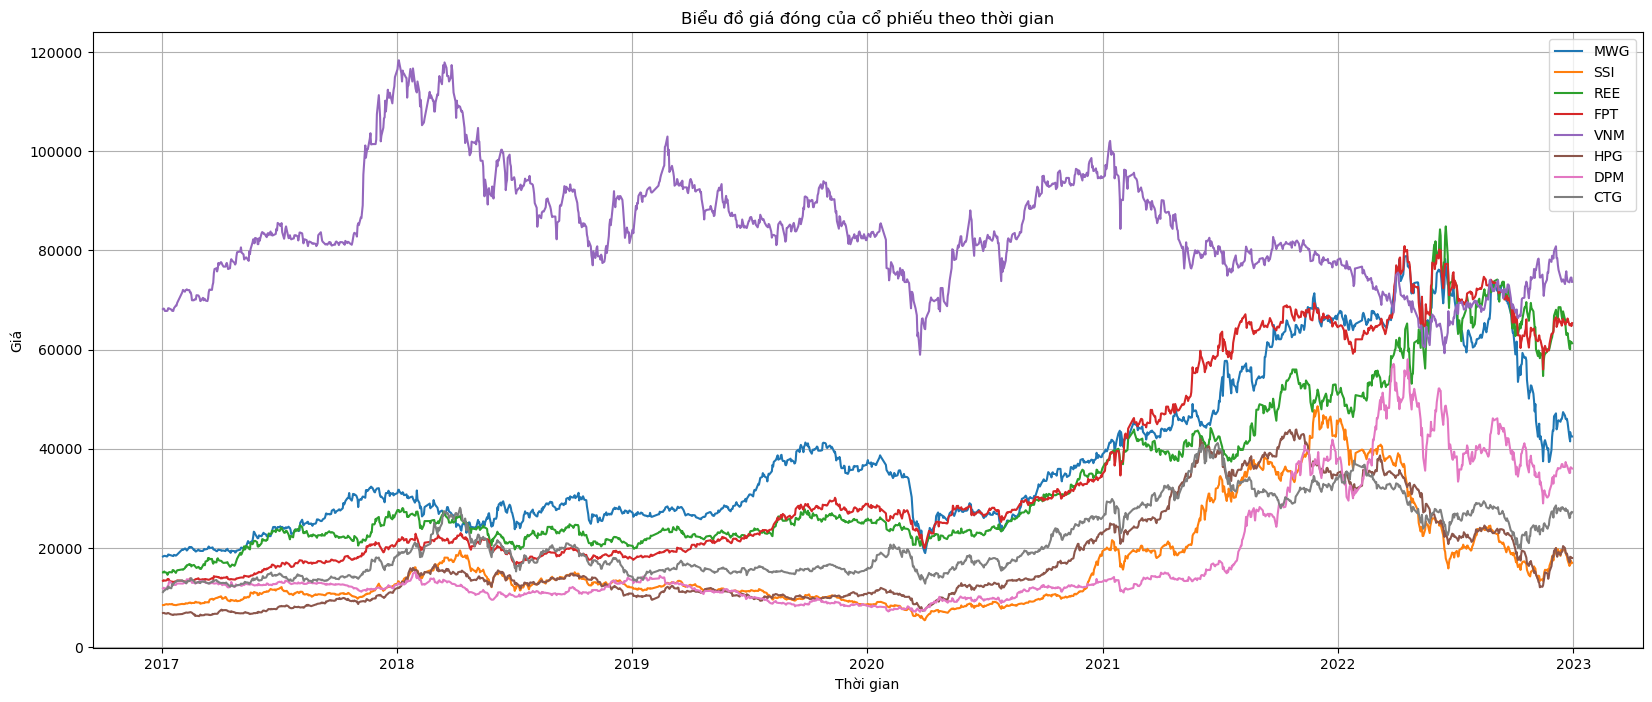

In [8]:
# Đặt kích thước đồ thị
plt.figure(figsize=(20, 8))

# Vẽ đồ thị giá cho từng tài sản
for asset in name_assets_lst:
    plt.plot(DL['time'], DL[asset], label=asset)

# Đặt tiêu đề và nhãn cho đồ thị
plt.title('Biểu đồ giá đóng của cổ phiếu theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá')
plt.legend(loc='upper right')
plt.grid(True)

# Hiển thị đồ thị
plt.show()


          Mã CK              MWG             SSI             REE             FPT              VNM              HPG             DPM              CTG
0   Quý 1  2017   25900588583100  11682809212500   8464390279800  21726985768400  207988101239500   25746490790800   9489855805000   67393622463600
1   Quý 2  2017   31655098599600  13544221162500  11440879169400  21627865764300  228731690211200   40452675744000   9196355110000   75398942259000
2   Quý 3  2017   35777336901200  12270623512500  10882787502600  25880338038750  216540407230400   59009024272200   8902854415000   68882984286000
3   Quý 4  2017   41494810287000  14395661856000  12867113429000  30313175425900  302736736820000   71067218180050   8413686590000   90106390255200
..          ...              ...             ...             ...             ...              ...              ...             ...              ...
20  Quý 1  2022  106729166997000  41696189682000  25249460654200  97108026443000  169077395500500  2017288140406

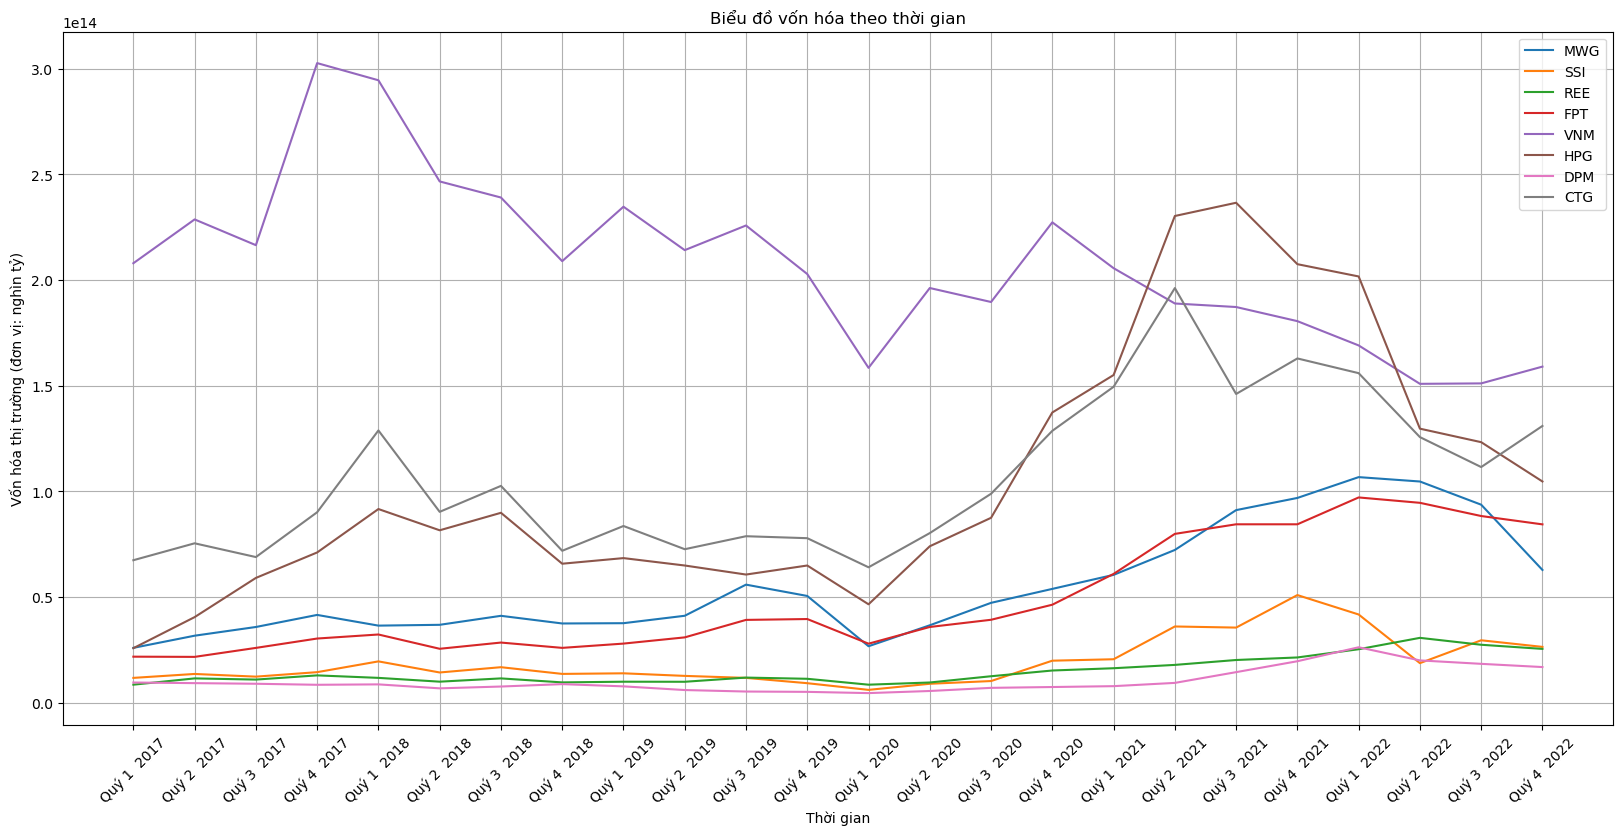

In [9]:
# --- VẼ ĐỒ THỊ VỐN HÓA ---
# Đọc tệp Excel và tạo DataFrame
von_hoa = pd.read_excel(du_lieu_luan, sheet_name='Vonhoa')
print(von_hoa)

# Đặt kích thước đồ thị
plt.figure(figsize=(20, 9))

# Vẽ biểu đồ đường
for asset in name_assets_lst:
    plt.plot(von_hoa['Mã CK'], von_hoa[asset], label=asset)

# Xoay nhãn trục x
plt.xticks(rotation=45)
plt.title('Biểu đồ vốn hóa theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Vốn hóa thị trường (đơn vị: nghìn tỷ)')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

In [10]:
# Tùy chọn để chỉ hiển thị 3 hàng đầu và 3 hàng cuối
pd.set_option('display.max_rows', 3 * 2 + 1)

In [11]:
# --- TÍNH LỢI NHUẬN HẰNG NGÀY ---
# Tính lợi nhuận hằng ngày của từng loại tài sản 
log_ret = np.log(DL.drop(columns=['time']) / DL.drop(columns=['time']).shift())

# Thêm cột 'time' vào lại log_ret
log_ret.insert(0, 'time', DL['time'])
log_ret = log_ret.dropna()

#In bảng giá trị ln(return)
print(log_ret)

            time       MWG       SSI       REE       FPT       VNM       HPG       DPM       CTG
1     2017-01-04  0.003818  0.000000  0.000000  0.008915  0.001613  0.000000  0.011735  0.018411
2     2017-01-05  0.003261  0.002347  0.011850 -0.002963 -0.001613  0.002890 -0.008368  0.006150
3     2017-01-06  0.000000  0.010496 -0.011850 -0.003716 -0.005443 -0.016000 -0.012685  0.008981
...          ...       ...       ...       ...       ...       ...       ...       ...       ...
1497  2022-12-28 -0.018379 -0.002860 -0.002922  0.002612  0.005247 -0.002743  0.005804  0.020466
1498  2022-12-29 -0.002351 -0.030825  0.000000 -0.006635  0.000000 -0.011050 -0.005804 -0.005540
1499  2022-12-30  0.000000  0.005889 -0.004072  0.009241 -0.011743  0.000000 -0.001109  0.009217

[1499 rows x 9 columns]


In [12]:
# Chuyển cột 'time' sang kiểu datetime
log_ret['time'] = pd.to_datetime(log_ret['time'])
# Trích xuất năm từ cột 'time'
log_ret['year'] = log_ret['time'].dt.year

C:\Users\Admin\AppData\Local\Temp\ipykernel_21996\952218476.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cum_sum = log_ret.groupby('year').sum()


           MWG       SSI       REE       FPT       VNM       HPG       DPM       CTG
year                                                                                
2017  0.522236  0.400360  0.565840  0.421260  0.522378  0.530032  0.052557  0.482825
2018 -0.112046 -0.047570 -0.258161 -0.112898 -0.343879 -0.078837  0.093126 -0.226278
2019  0.287319 -0.345764  0.216304  0.456758  0.007093 -0.013921 -0.491814  0.079669
2020  0.056070  0.814425  0.346783  0.192684  0.142207  0.767422  0.456957  0.516900
2021  0.542270  0.844637  0.344401  0.613761 -0.191795  0.421105  1.045663  0.259757
2022 -0.453482 -0.972352  0.185427  0.012784 -0.058538 -0.668399 -0.045031 -0.218361

q
year
2017    0.783484
2018    0.795888
2019    1.884457
2020    1.817960
2021    2.212862
2022    2.407238
dtype: float64


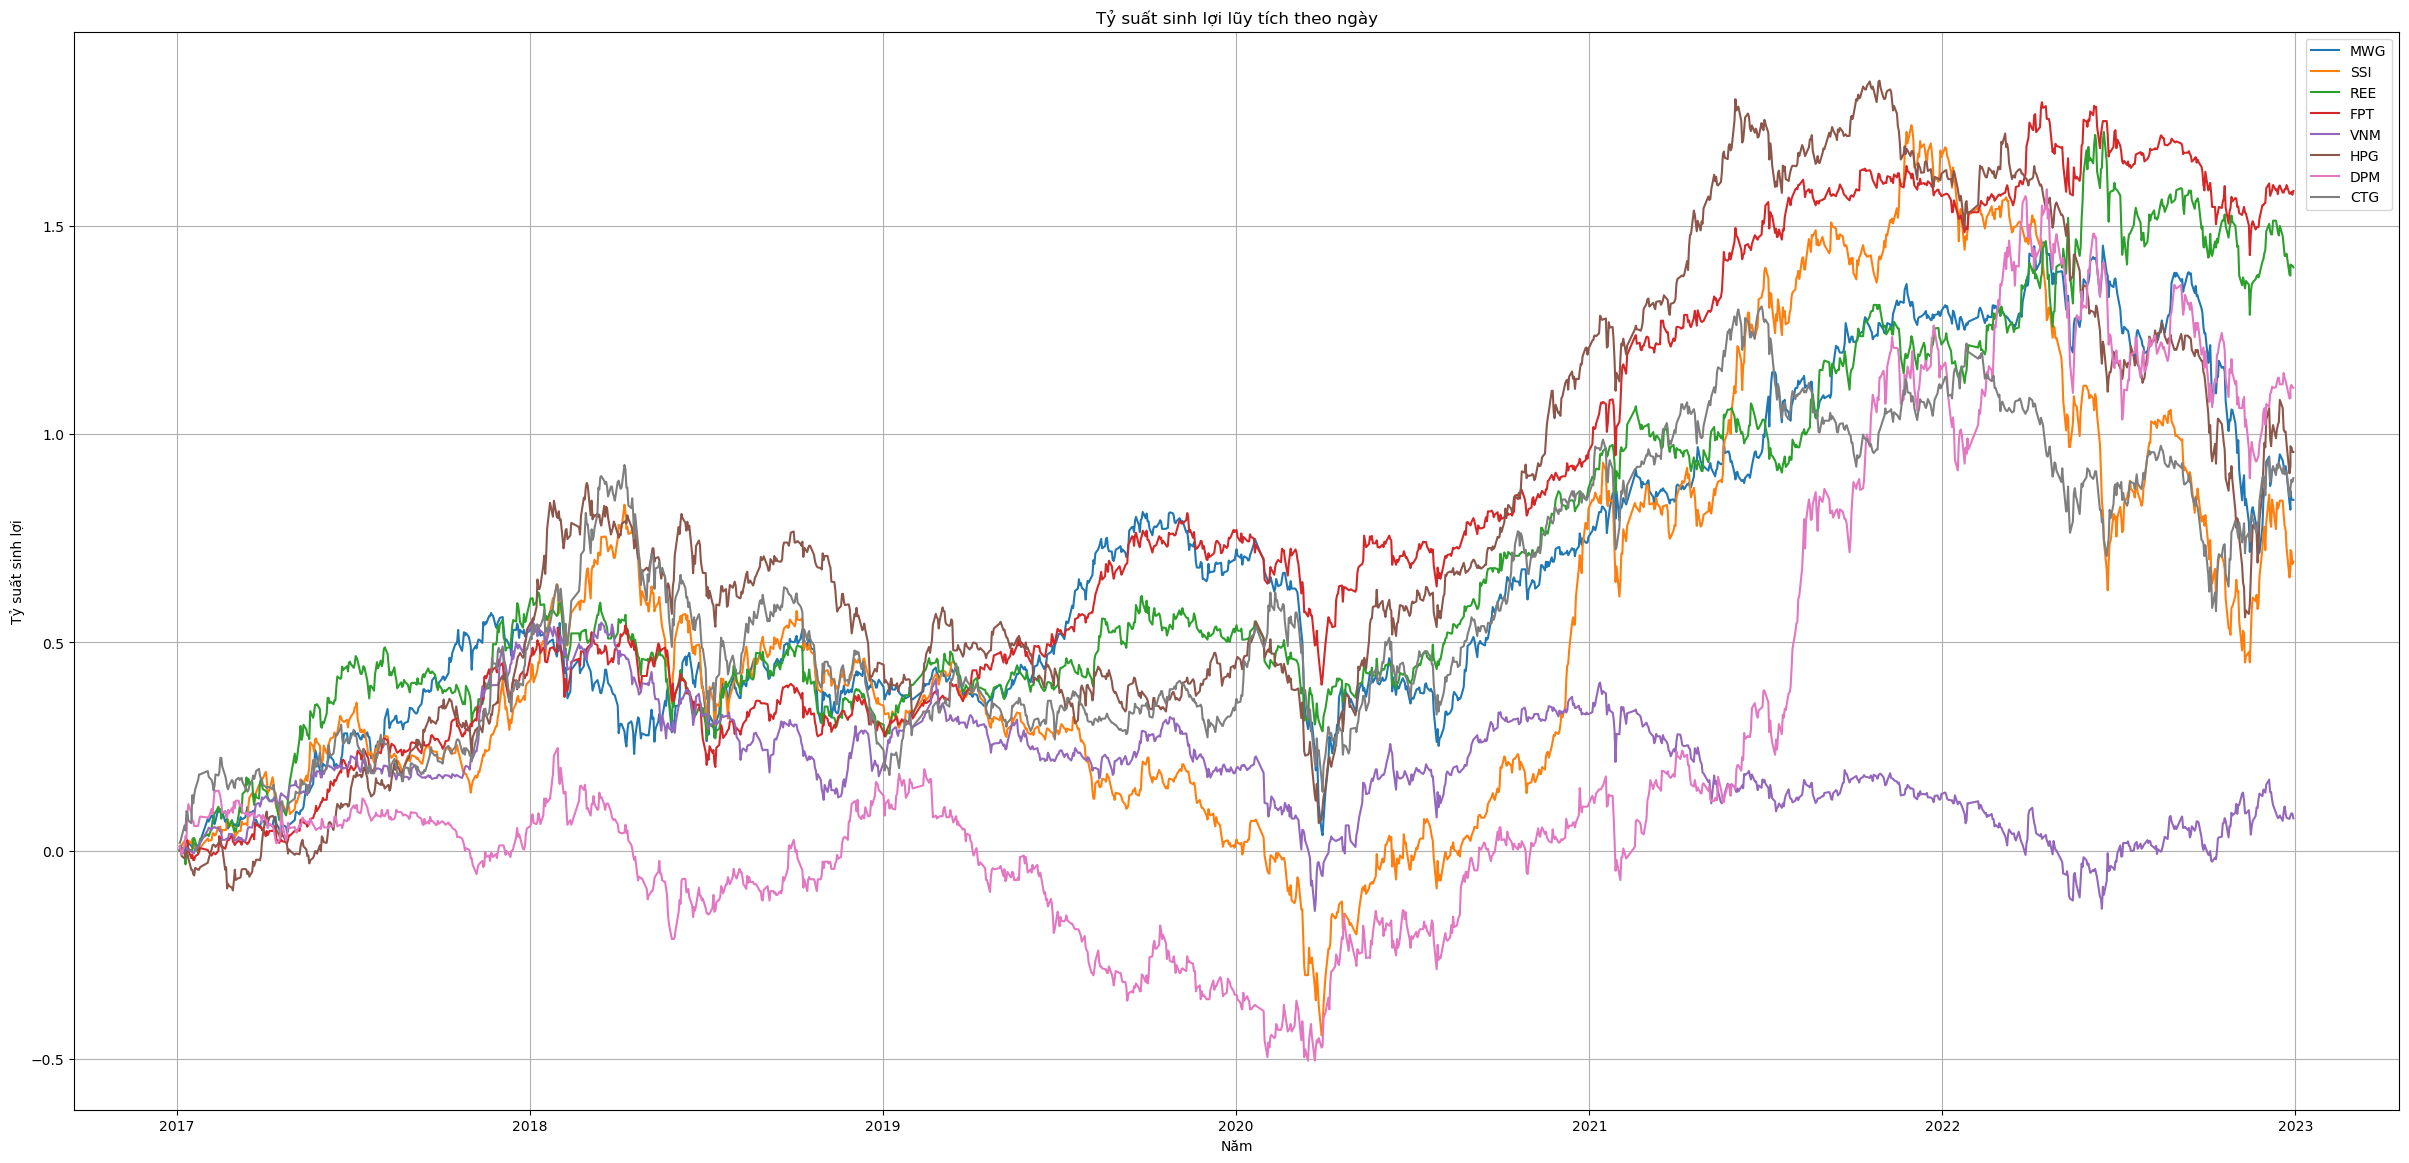

In [13]:
# Vẽ đồ thị lợi nhuận lũy tích cho từng tài sản
plt.figure(figsize=(30, 14))

for asset in name_assets_lst:
    plt.plot(log_ret['time'], log_ret[asset].cumsum(), label=asset)

cum_sum = log_ret.groupby('year').sum()
print(cum_sum)

# Tính tổng 4 giá trị cao nhất và tổng 4 giá trị nhỏ nhất trong mỗi năm
high_4_sum = cum_sum.apply(lambda row: sum(sorted(row, reverse=True)[:4]), axis=1)
low_4_sum = cum_sum.apply(lambda row: sum(sorted(row)[:4]), axis=1)

# Tính kết quả cuối cùng
q = high_4_sum - low_4_sum
print('\nq')
print(q)

# Đặt tiêu đề và nhãn cho đồ thị
plt.title('Tỷ suất sinh lợi lũy tích theo ngày')
plt.xlabel('Năm')
plt.ylabel('Tỷ suất sinh lợi')
plt.legend(loc='upper right')
plt.grid(True)

# Hiển thị đồ thị
plt.show()

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
# Chuyển cột 'time' sang kiểu datetime
log_ret['time'] = pd.to_datetime(log_ret['time'])
# Trích xuất năm từ cột 'time'
log_ret['year'] = log_ret['time'].dt.year

C:\Users\Admin\AppData\Local\Temp\ipykernel_21996\3453545641.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  log_ret_mean = log_ret.groupby('year').mean()


           MWG       SSI       REE       FPT       VNM       HPG       DPM       CTG
year                                                                                
2017  0.002097  0.001608  0.002272  0.001692  0.002098  0.002129  0.000211  0.001939
2018 -0.000452 -0.000192 -0.001041 -0.000455 -0.001387 -0.000318  0.000376 -0.000912
2019  0.001149 -0.001383  0.000865  0.001827  0.000028 -0.000056 -0.001967  0.000319
2020  0.000222  0.003232  0.001376  0.000765  0.000564  0.003045  0.001813  0.002051
2021  0.002169  0.003379  0.001378  0.002455 -0.000767  0.001684  0.004183  0.001039
2022 -0.001814 -0.003889  0.000742  0.000051 -0.000234 -0.002674 -0.000180 -0.000873


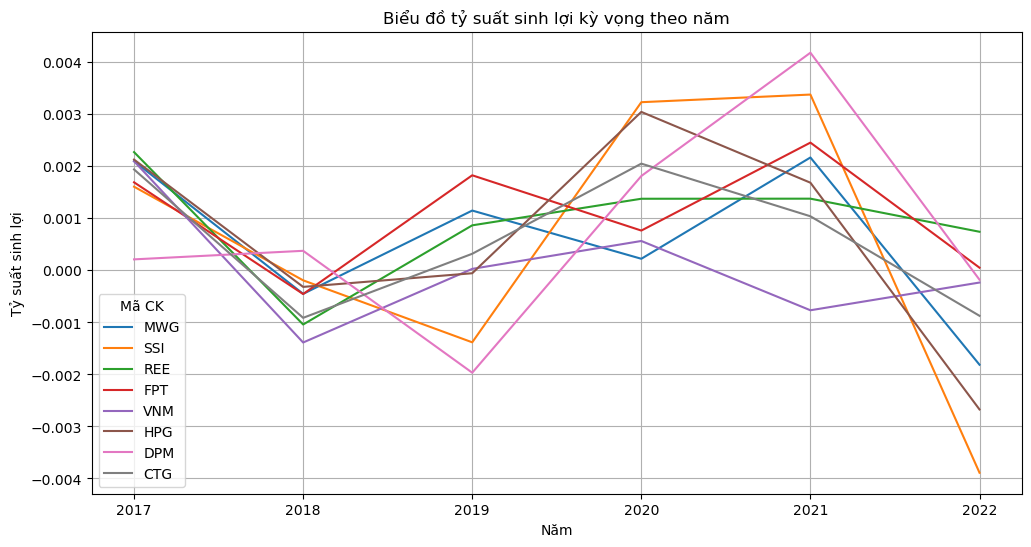

In [16]:
# --- TÍNH KỲ VỌNG LỢI NHUẬN BẰNG GÓI CÓ SẴN ---
log_ret_mean = log_ret.groupby('year').mean()
print(log_ret_mean)

log_ret_mean.index = [2017, 2018, 2019, 2020, 2021, 2022]

plt.figure(figsize=(12, 6))
for column in log_ret_mean.columns:
    plt.plot(log_ret_mean.index, log_ret_mean[column], label=column)

plt.title('Biểu đồ tỷ suất sinh lợi kỳ vọng theo năm')
plt.xlabel('Năm')
plt.ylabel('Tỷ suất sinh lợi')
plt.grid(True)
plt.legend(title='Mã CK')
plt.show()

In [17]:
# --- TÍNH ĐỘ BIẾN ĐỘNG BẰNG GÓI CÓ SẴN ---
log_ret_volatility = np.sqrt(log_ret.groupby('year').var())
print(log_ret_volatility)

           MWG       SSI       REE       FPT       VNM       HPG       DPM       CTG
year                                                                                
2017  0.014928  0.015447  0.018457  0.011732  0.011775  0.015327  0.012789  0.017760
2018  0.023702  0.027650  0.019676  0.018675  0.016842  0.024469  0.020022  0.030513
2019  0.013140  0.012941  0.013953  0.012675  0.012318  0.016804  0.017239  0.015099
2020  0.023905  0.027263  0.017627  0.018827  0.018696  0.022856  0.025307  0.025370
2021  0.020564  0.029795  0.021195  0.018477  0.014755  0.022222  0.028956  0.023895
2022  0.028317  0.035175  0.030598  0.020991  0.017245  0.029519  0.037958  0.027312


C:\Users\Admin\AppData\Local\Temp\ipykernel_21996\3635738589.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  log_ret_volatility = np.sqrt(log_ret.groupby('year').var())


In [18]:
# --- TÍNH HIỆP PHƯƠNG SAI ---
log_ret_cov = log_ret.groupby('year').cov()
print('Ma trận hiệp phương sai')
print(log_ret_cov)

Ma trận hiệp phương sai
               MWG       SSI       REE       FPT       VNM       HPG       DPM       CTG
year                                                                                    
2017 MWG  0.000223  0.000042  0.000074  0.000032  0.000015  0.000056  0.000004  0.000066
     SSI  0.000042  0.000239  0.000110  0.000048  0.000050  0.000053  0.000036  0.000112
     REE  0.000074  0.000110  0.000341  0.000062  0.000031  0.000054  0.000030  0.000075
     FPT  0.000032  0.000048  0.000062  0.000138  0.000025  0.000033  0.000015  0.000055
     VNM  0.000015  0.000050  0.000031  0.000025  0.000139  0.000010  0.000024  0.000042
     HPG  0.000056  0.000053  0.000054  0.000033  0.000010  0.000235  0.000044  0.000068
     DPM  0.000004  0.000036  0.000030  0.000015  0.000024  0.000044  0.000164  0.000013
     CTG  0.000066  0.000112  0.000075  0.000055  0.000042  0.000068  0.000013  0.000315
2018 MWG  0.000562  0.000314  0.000227  0.000231  0.000119  0.000253  0.000078  0.0003

C:\Users\Admin\AppData\Local\Temp\ipykernel_21996\3803949077.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cov is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  log_ret_cov = log_ret.groupby('year').cov()


In [19]:
# --- TÍNH TƯƠNG QUAN ---
log_ret_corr = log_ret.groupby('year').corr()
print('\nMa trận tương quan')
print(log_ret_corr)


Ma trận tương quan
               MWG       SSI       REE       FPT       VNM       HPG       DPM       CTG
year                                                                                    
2017 MWG  1.000000  0.180542  0.266994  0.182090  0.084238  0.244078  0.022990  0.247079
     SSI  0.180542  1.000000  0.384238  0.262205  0.275709  0.225042  0.182418  0.407027
     REE  0.266994  0.384238  1.000000  0.285097  0.140627  0.191163  0.125348  0.228636
     FPT  0.182090  0.262205  0.285097  1.000000  0.181403  0.183530  0.103237  0.264788
     VNM  0.084238  0.275709  0.140627  0.181403  1.000000  0.058075  0.157274  0.199987
     HPG  0.244078  0.225042  0.191163  0.183530  0.058075  1.000000  0.225101  0.249690
     DPM  0.022990  0.182418  0.125348  0.103237  0.157274  0.225101  1.000000  0.056686
     CTG  0.247079  0.407027  0.228636  0.264788  0.199987  0.249690  0.056686  1.000000
2018 MWG  1.000000  0.478800  0.486426  0.520802  0.298601  0.435896  0.164641  0.521836
 

C:\Users\Admin\AppData\Local\Temp\ipykernel_21996\1516993865.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  log_ret_corr = log_ret.groupby('year').corr()


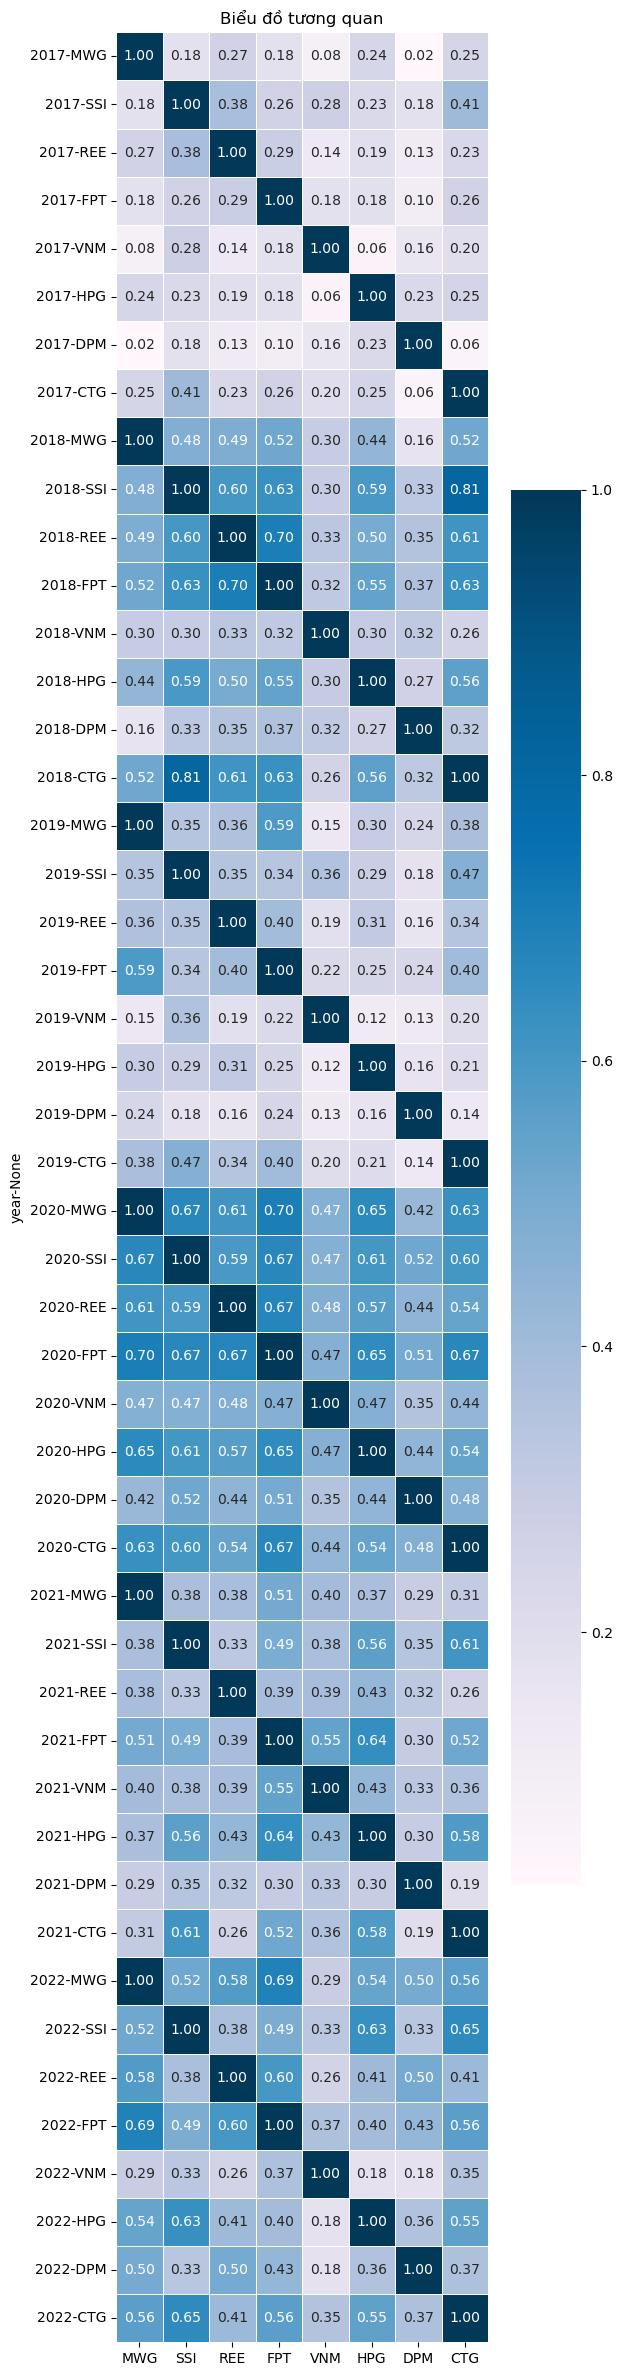

In [20]:
#Vẽ biểu đồ tương quan
plt.figure(figsize=(6, 30))
sns.heatmap(log_ret_corr, annot=True, cmap='PuBu', fmt=".2f", linewidths=.5)
plt.title('Biểu đồ tương quan')
plt.show()

In [21]:
# --- TÍNH TRỌNG SỐ THỊ TRƯỜNG ---
von_hoa = pd.read_excel(du_lieu_luan, sheet_name='Vonhoa')
von_hoa['Total'] = von_hoa.drop(columns=['Mã CK']).sum(axis=1)


for asset in name_assets_lst:
    von_hoa[asset] = von_hoa[asset] / von_hoa['Total']

w_thi_truong = von_hoa.drop(columns=['Total', 'Mã CK'])
w_thi_truong = w_thi_truong.groupby(w_thi_truong.index // 4).mean()
w_thi_truong.insert(0, 'year', [2017, 2018, 2019, 2020, 2021, 2022])

#print(von_hoa)
print('\n',w_thi_truong)


    year       MWG       SSI       REE       FPT       VNM       HPG       DPM       CTG
0  2017  0.073998  0.028856  0.024052  0.054899  0.525779  0.105181  0.020352  0.166883
1  2018  0.072908  0.030255  0.020252  0.053245  0.468283  0.155627  0.015215  0.184215
2  2019  0.098061  0.025090  0.022700  0.072952  0.465294  0.137410  0.012663  0.165829
3  2020  0.085091  0.022335  0.023797  0.078505  0.411235  0.173811  0.012769  0.192458
4  2021  0.101413  0.044740  0.024032  0.098026  0.245079  0.262151  0.016025  0.208533
5  2022  0.133303  0.041829  0.040062  0.133397  0.231113  0.200066  0.029353  0.190878


           MWG       SSI       REE       FPT       VNM       HPG       DPM       CTG
2017  0.073998  0.028856  0.024052  0.054899  0.525779  0.105181  0.020352  0.166883
2018  0.072908  0.030255  0.020252  0.053245  0.468283  0.155627  0.015215  0.184215
2019  0.098061  0.025090  0.022700  0.072952  0.465294  0.137410  0.012663  0.165829
2020  0.085091  0.022335  0.023797  0.078505  0.411235  0.173811  0.012769  0.192458
2021  0.101413  0.044740  0.024032  0.098026  0.245079  0.262151  0.016025  0.208533
2022  0.133303  0.041829  0.040062  0.133397  0.231113  0.200066  0.029353  0.190878


[Text(0, 0, '2017'),
 Text(1, 0, '2018'),
 Text(2, 0, '2019'),
 Text(3, 0, '2020'),
 Text(4, 0, '2021'),
 Text(5, 0, '2022')]

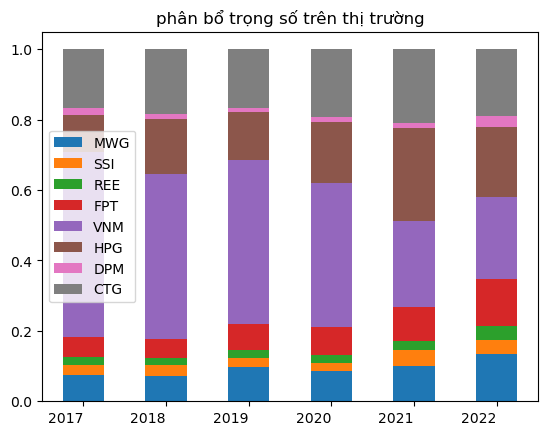

In [22]:
#Vẽ đồ thị trọng số thị trường
kq_trong_so1 = pd.DataFrame(w_thi_truong)
nam = ['2017', '2018', '2019', '2020', '2021', '2022']
# Chuyển vị DataFrame và đặt lại tên cột
kq_trong_so = kq_trong_so1.drop(columns=['year']).transpose()
kq_trong_so = kq_trong_so.reindex(columns=[0,1,2,3,4,5])
kq_trong_so = kq_trong_so1.drop(columns=['year'])
kq_trong_so = kq_trong_so.rename(index={0: '2017', 1: '2018', 2: '2019', 3: '2020', 4: '2021', 5: '2022'})

print(kq_trong_so)
# Plot dữ liệu dưới dạng biểu đồ cột chồng
ax = kq_trong_so.plot(kind='bar', stacked=True, title='phân bổ trọng số trên thị trường')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')

In [23]:
# Xác định dữ liệu quá khứ lùi về 3 tháng
DL['time'] = pd.to_datetime(DL['time'])
DL_near = DL[(DL['time'].dt.month >= 10) & (DL['time'].dt.month <= 12)]

log_ret_near = np.log(DL_near.drop(columns=['time']) / DL_near.drop(columns=['time']).shift())
log_ret_near.insert(0, 'time', DL_near['time'])
log_ret_near = log_ret_near.dropna()

#Chuyển cột 'time' sang kiểu datetime
log_ret_near['time'] = pd.to_datetime(log_ret_near['time'])
# Trích xuất năm từ cột 'time'
log_ret_near['year'] = log_ret_near['time'].dt.year

log_ret_near_mean = log_ret_near.groupby('year').mean()
print(log_ret_near_mean)

           MWG       SSI       REE       FPT       VNM       HPG       DPM       CTG
year                                                                                
2017  0.001728  0.002809  0.002777  0.002654  0.005387  0.002854 -0.000273  0.004239
2018 -0.001724 -0.000732 -0.003972 -0.001737 -0.005290 -0.001213  0.001433 -0.003481
2019  0.004353 -0.005239  0.003277  0.006921  0.000107 -0.000211 -0.007452  0.001207
2020  0.000850  0.012340  0.005254  0.002919  0.002155  0.011628  0.006924  0.007832
2021  0.008216  0.012798  0.005218  0.009299 -0.002906  0.006380  0.015843  0.003936
2022 -0.006871 -0.014733  0.002810  0.000194 -0.000887 -0.010127 -0.000682 -0.003309


C:\Users\Admin\AppData\Local\Temp\ipykernel_21996\1129764274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DL['time'] = pd.to_datetime(DL['time'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_21996\1129764274.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  log_ret_near_mean = log_ret_near.groupby('year').mean()


In [24]:
# Đọc tệp Excel và tạo DataFrame
P_view = pd.read_excel(du_lieu_luan, sheet_name='Matrix P')
print(P_view)

   year  MWG  SSI  REE  FPT  VNM  HPG  DPM  CTG
0  2017    1   -3    4   -2    2    3    4   -1
1  2018    1    3   -3   -1   -4    2    4   -2
2  2019    3   -3    2    4   -1   -2   -4    1
3  2020   -4    4   -1   -2   -3    3    1    2
4  2021    1    3   -2    2   -4   -1    4   -3
5  2022   -2   -4    4    3    1   -3    2   -1


  Mã CK  Năm 2017  Năm 2018  Năm 2019  Năm 2020  Năm 2021  Năm 2022
0   MWG  0.001750 -0.001966  0.002548  0.004511  0.005772 -0.004208
1   SSI  0.002752 -0.002030 -0.001635  0.007801  0.008932 -0.008373
2   REE  0.002464 -0.002335  0.001874  0.004126  0.004405 -0.000648
3   FPT  0.002041 -0.001702  0.003333  0.004210  0.005686 -0.001439
4   VNM  0.003843 -0.002941 -0.000025  0.003099  0.001036 -0.001030
5   HPG  0.002184 -0.001760  0.000202  0.006865  0.005994 -0.006658
6   DPM  0.000440 -0.000168 -0.003088  0.005561  0.009233 -0.001872
7   CTG  0.003780 -0.002618  0.000942  0.006078  0.004913 -0.004166

   Mã CK  Năm 2017  Năm 2018  Năm 2019  Năm 2020  Năm 2021  Năm 2022
0   MWG  0.016485  0.004881  0.049678  0.003091  0.039166 -0.027069
1   SSI  0.000435  0.028230 -0.019454  0.122311  0.097085 -0.123238
2   REE  0.041540 -0.012106  0.036855  0.017313 -0.004445  0.052902
3   FPT  0.001519 -0.000351  0.055953  0.026475  0.025859  0.008267
4   VNM  0.011733 -0.020942 -0.014758 -0.01415

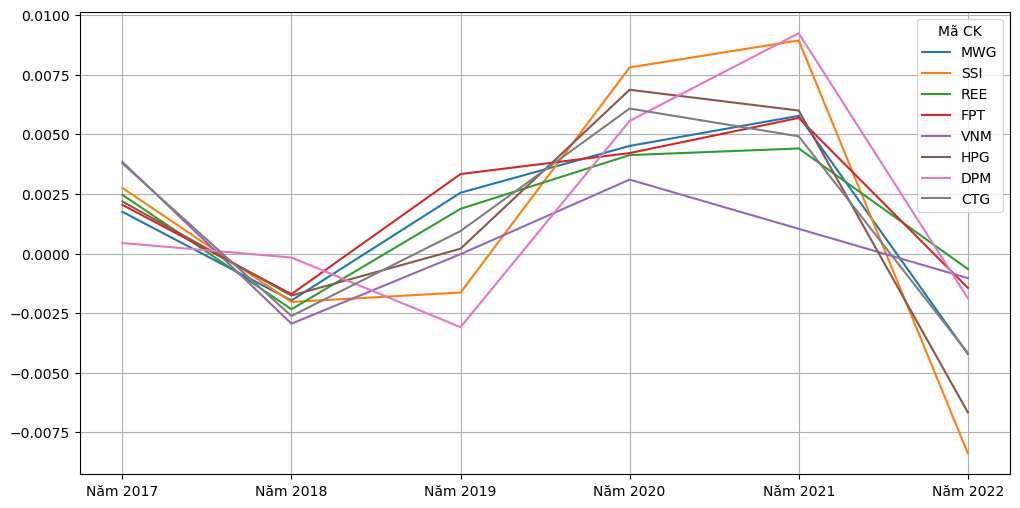

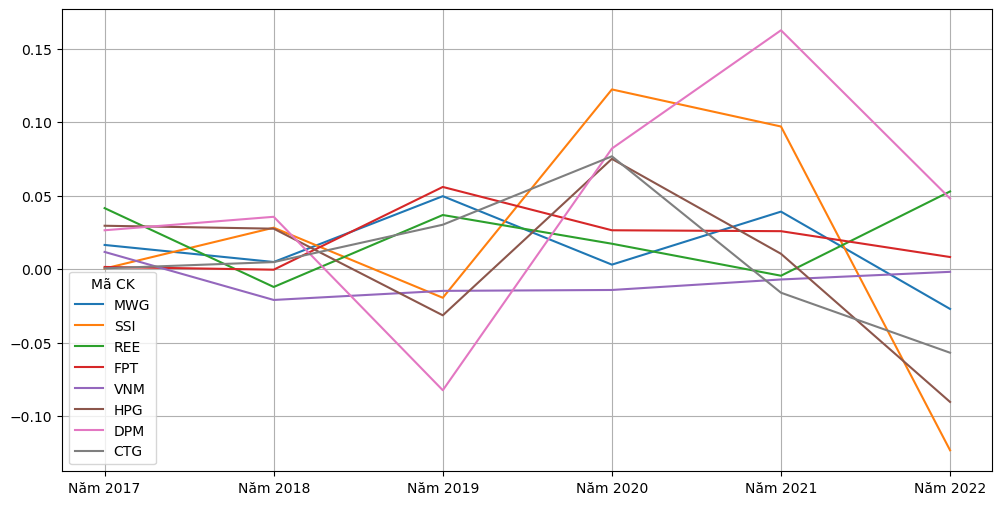

In [25]:
data_post_ret = {'Mã CK': ['MWG', 'SSI', 'REE', 'FPT', 'VNM', 'HPG', 'DPM', 'CTG']}
BL_data_post_ret = pd.DataFrame(data_post_ret)
BL_view_data_post_ret = pd.DataFrame(data_post_ret)
year_lst = [2017, 2018, 2019, 2020, 2021, 2022]
for year in year_lst:
    # Tính toán các đầu vào
    # Ma trận hiệp phương sai cho năm {year}
    log_ret_cov_single = log_ret_cov.loc[year].to_numpy()
    # Trọng số thị trường năm {year}
    w_thi_truong_single = w_thi_truong.loc[w_thi_truong['year'] == year].drop(columns=\
    ['year']).to_numpy().T
    # Lợi nhuận kỳ vọng năm {year}
    log_ret_mean_single = log_ret_mean.loc[year].to_numpy().reshape(1, -1).T
    # Lợi nhuận kỳ vọng 3 tháng cuối năm {year}
    log_ret_near_mean_single = log_ret_near_mean.loc[year].to_numpy().reshape(1, -1).T
    # Lãi suất phi rủi ro năm {year}
    r_f_single = r_f.loc[r_f['Năm'] == year].drop(columns=['Năm']).to_numpy()
    # Tính hệ số né tránh rủi ro
    delta = ((np.dot(w_thi_truong_single.T, log_ret_mean_single)) - \
    r_f_single)/np.dot(np.dot(w_thi_truong_single.T, log_ret_cov_single),\
    w_thi_truong_single)
    # Tính lợi nhuận kỳ vọng tiên nghiệm (prior expected return)
    pi = delta * np.dot(log_ret_cov_single, w_thi_truong_single)
    # Tham số tau
    tau = 0.5
    
    #--- mô hình BL ---
    # Ma trận quan điểm tính theo quá khứ năm {year}
    P = np.identity(num_assets)
    Q = log_ret_near_mean_single
    Omega = np.identity(len(P))
    for i in range(len(P)):
        P_i = P[i]
        omg_i = tau * np.dot(np.dot(P_i, log_ret_cov_single), P_i.T) 
        Omega[i,i]= omg_i
    # Tính vectơ lợi nhuận kết hợp mới
    post_ret = np.dot(np.linalg.inv(np.linalg.inv(tau * log_ret_cov_single) +\
                np.dot(np.dot(P.T, np.linalg.inv(Omega)), P)),np.dot(\
                np.linalg.inv(tau*log_ret_cov_single), pi) + \
                np.dot(np.dot(P.T, np.linalg.inv(Omega)), Q))

    #--- BL_View ---
    # Ma trận quan điểm cá nhân năm {year}
    q_t = np.array(q.loc[year]).reshape(1, -1)
    P_view_single = P_view.loc[P_view['year'] == year].drop(columns=['year']).to_numpy()
    # Tính ma trận quan điểm không chắc chắn - Omega (Kích thước: KxK)
    Omega_view_single = np.identity(len(P_view_single))
    for i in range(len(P_view_single)):
        P_view_single_i = P_view_single[i]
        omg_view_single_i = tau * np.dot(np.dot(P_view_single_i, log_ret_cov_single),\
                            P_view_single_i.T)
        Omega_view_single[i,i]= omg_view_single_i
    # Tính vectơ lợi nhuận kết hợp mới
    post_ret_view_single = np.dot(np.linalg.inv(np.linalg.inv(tau * log_ret_cov_single)\
                    + np.dot(np.dot(P_view_single.T,np.linalg.inv(Omega_view_single)),\
                    P_view_single)),np.dot(np.linalg.inv(tau * log_ret_cov_single),pi)\
                    +np.dot(np.dot(P_view_single.T,np.linalg.inv(Omega_view_single)),q_t))
    # Kết quả vector lợi nhuận mới
    new_col = f'Năm {year}'
    BL_data_post_ret[new_col] = [post_ret[0,0],post_ret[1,0],post_ret[2,0],post_ret[3,0],\
                                post_ret[4,0],post_ret[5,0],post_ret[6,0],post_ret[7,0]]
    BL_view_data_post_ret[new_col] = [post_ret_view_single[0,0],post_ret_view_single[1,0],\
                                    post_ret_view_single[2,0],post_ret_view_single[3,0],\
                                    post_ret_view_single[4,0],post_ret_view_single[5,0],\
                                    post_ret_view_single[6,0],post_ret_view_single[7,0]]
    
# Mô hình BL
print(BL_data_post_ret)
BL_data_post_ret.set_index('Mã CK', inplace=True)
BL_data_post_ret.T.plot(kind='line', figsize=(12, 6))
plt.grid(True)
# Mô hình BL quan điểm cá nhân
print('\n',BL_view_data_post_ret)
BL_view_data_post_ret.set_index('Mã CK', inplace=True)
BL_view_data_post_ret.T.plot(kind='line', figsize=(12, 6))
plt.grid(True)

  Mã CK  BL Năm 2018  BL Năm 2019  BL Năm 2020  BL Năm 2021  BL Năm 2022  BL Năm 2023
0   MWG     0.038623     0.000000     0.242815     0.000000     0.185315     0.269009
1   SSI     0.021208     0.000000     0.000000     0.241766     0.135020     0.375799
2   REE     0.033459     0.260546     0.164956     0.145607     0.056948     0.000000
3   FPT     0.128031     0.019418     0.511263     0.000000     0.326694     0.000000
4   VNM     0.534159     0.617888     0.045473     0.000000     0.000000     0.022725
5   HPG     0.120616     0.000000     0.000000     0.386454     0.060909     0.332467
6   DPM     0.000000     0.000000     0.000000     0.085151     0.235114     0.000000
7   CTG     0.123904     0.102148     0.035494     0.141022     0.000000     0.000000

   Mã CK  BL Năm 2018  BL Năm 2019  BL Năm 2020  BL Năm 2021  BL Năm 2022  BL Năm 2023
0   MWG     0.072525     0.000000     0.299973     0.000000     0.100725     0.200271
1   SSI     0.000000     0.000000     0.000000     0

<Axes: >

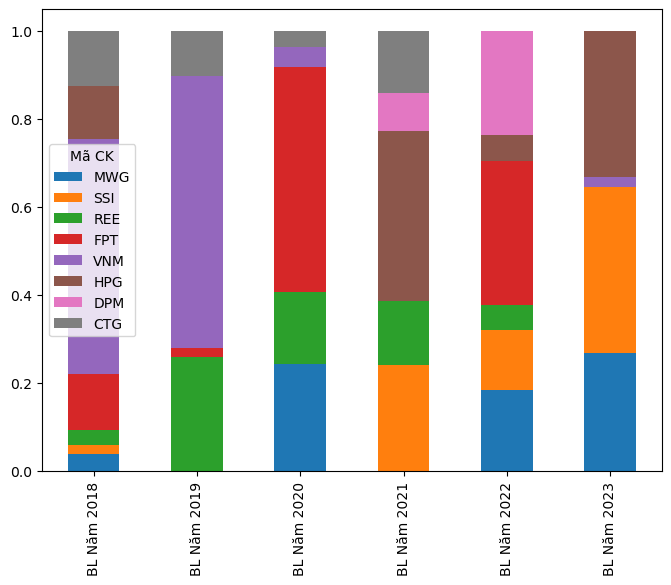

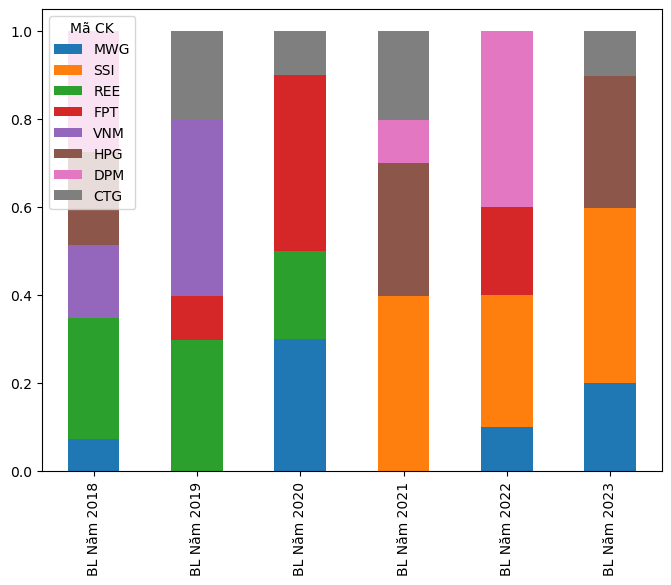

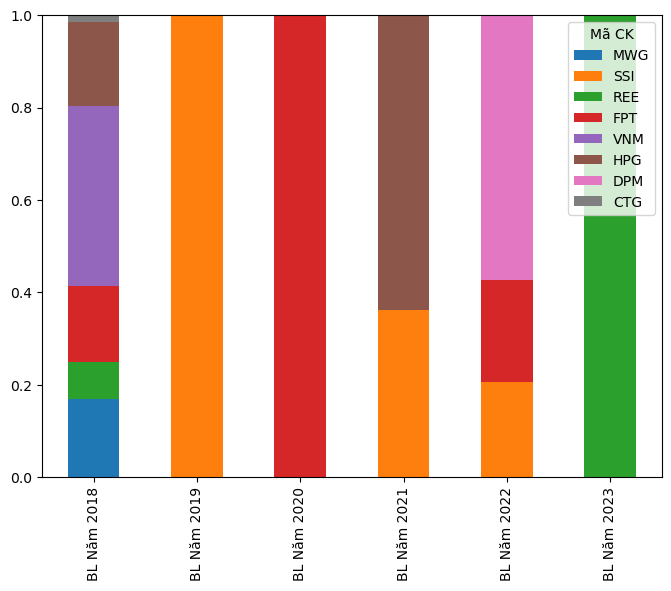

In [26]:
data = {'Mã CK': ['MWG', 'SSI', 'REE', 'FPT', 'VNM', 'HPG', 'DPM', 'CTG']}
weight_three_BL = pd.DataFrame(data)
weight_three_BL_view = pd.DataFrame(data)
weight_three_MPT = pd.DataFrame(data)

# Tính trọng số đều
w_eq = np.array([1/len(name_assets_lst) for i in range(0,num_assets)]).reshape(-1,1)
# Ma trận q (BL_View)
q_single = q.drop(columns=['year']).to_numpy().reshape(1, -1).T
for year in year_lst:
    # Ma trận hiệp phương sai cho năm {year}
    log_ret_cov_single = log_ret_cov.loc[year].to_numpy()
    # Trọng số thị trường năm {year}
    w_thi_truong_single = w_thi_truong.loc[w_thi_truong['year'] == year].drop\
                            (columns=['year']).to_numpy().T
    # Lợi nhuận kỳ vọng năm {year}
    log_ret_mean_single = log_ret_mean.loc[year].to_numpy().reshape(1, -1).T
    # Lợi nhuận kỳ vọng 3 tháng cuối năm {year}
    log_ret_near_mean_single = log_ret_near_mean.loc[year].to_numpy().reshape(1, -1).T
    # Lãi suất phi rủi ro năm {year}
    r_f_single = r_f.loc[r_f['Năm'] == year].drop(columns=['Năm']).to_numpy()
    # Tính hệ số né tránh rủi ro
    delta = ((np.dot(w_thi_truong_single.T, log_ret_mean_single)) - \
            r_f_single)/np.dot(np.dot(w_thi_truong_single.T, log_ret_cov_single),\
            w_thi_truong_single)
    # Tính lợi nhuận kỳ vọng tiên nghiệm (prior expected return)
    pi = delta * np.dot(log_ret_cov_single, w_thi_truong_single)
    
    #--- BL ---
    # Ma trận quan điểm tính theo quá khứ năm {year}
    P = np.identity(num_assets)
    Q = log_ret_near_mean_single
    Omega = np.identity(len(P))
    for i in range(len(P)):
        P_i = P[i]
        omg_i = tau * np.dot(np.dot(P_i, log_ret_cov_single), P_i.T) 
        Omega[i,i]= omg_i
    # Tính vectơ lợi nhuận kết hợp mới
    post_ret = np.dot(np.linalg.inv(np.linalg.inv(tau * log_ret_cov_single)\
                + np.dot(np.dot(P.T, np.linalg.inv(Omega)), P)),\
                np.dot(np.linalg.inv(tau * log_ret_cov_single), pi) +\
                np.dot(np.dot(P.T, np.linalg.inv(Omega)), Q))
    w_bl = np.dot(np.linalg.inv(delta * log_ret_cov_single), post_ret)
    w_bl = np.clip(w_bl, 0, None)
    w_bl = w_bl/ np.sum(w_bl)
    
    #--- BL_View ---
    # Ma trận quan điểm cá nhân năm {year}
    q_t = np.array(q.loc[year]).reshape(1, -1)
    P_view_single = P_view.loc[P_view['year'] == year].drop(columns=['year']).to_numpy()
    Omega_view_single = np.identity(len(P_view_single))
    for i in range(len(P_view_single)):
        P_view_single_i = P_view_single[i]
        omg_view_single_i = tau * np.dot(np.dot(P_view_single_i, log_ret_cov_single),\
                            P_view_single_i.T)
        Omega_view_single[i,i]= omg_view_single_i
    # Tính vectơ lợi nhuận kết hợp mới
    post_ret_view_single = np.dot(np.linalg.inv(np.linalg.inv(tau * log_ret_cov_single)\
                        +np.dot(np.dot(P_view_single.T,np.linalg.inv(Omega_view_single)),\
                        P_view_single)),np.dot(np.linalg.inv(tau*log_ret_cov_single), pi)\
                        +np.dot(np.dot(P_view_single.T,np.linalg.inv(Omega_view_single)),\
                        q_t))
    w_bl_view_single = np.dot(np.linalg.inv(delta*log_ret_cov_single),post_ret_view_single)
    w_bl_view_single = np.clip(w_bl_view_single, 0, None)
    w_bl_view_single = w_bl_view_single/ np.sum(w_bl_view_single)
    
     #--- MPT ---
    log_ret_mean_single_mpt = log_ret_mean_single.flatten()
    def objective_function(x, delta, log_ret_mean_single_mpt, log_ret_cov_single):
        return - (x.T @ log_ret_mean_single_mpt - delta/2 * x.T @ log_ret_cov_single @ x)
    # Gradient của hàm mục tiêu
    def gradient_objective_function(x, delta, log_ret_mean_single_mpt, log_ret_cov_single):
        return - (log_ret_mean_single_mpt - delta * log_ret_cov_single @ x)
    # Ràng buộc trọng số 
    constraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = [(0, 1) for _ in range(len(log_ret_mean_single))]
    x0 = np.array([1/len(log_ret_mean_single)] * len(log_ret_mean_single))
    # Tối ưu hóa
    result = minimize(objective_function, x0, args=(delta, log_ret_mean_single_mpt,\
                log_ret_cov_single),method='SLSQP',options={'ftol':1e-200,'disp':False},\
                bounds=bounds, constraints=constraint, jac=gradient_objective_function)
    w_mpt = result.x.reshape(-1, 1)

    new_col = f'BL Năm {year+1}'
    weight_three_BL[new_col] = [w_bl[0,0], w_bl[1,0], w_bl[2,0], w_bl[3,0], w_bl[4,0],\
                                w_bl[5,0], w_bl[6,0], w_bl[7,0]]
    weight_three_BL_view[new_col] = [w_bl_view_single[0,0], w_bl_view_single[1,0], w_bl_view_single[2,0],\
                                     w_bl_view_single[3,0], w_bl_view_single[4,0], w_bl_view_single[5,0],\
                                     w_bl_view_single[6,0], w_bl_view_single[7,0]]
    weight_three_MPT[new_col] = [w_mpt[0,0], w_mpt[1,0], w_mpt[2,0], w_mpt[3,0], w_mpt[4,0],\
                                w_mpt[5,0], w_mpt[6,0], w_mpt[7,0]]

#Vẽ đồ thị
print(weight_three_BL)
print('\n',weight_three_BL_view)
print('\n',weight_three_MPT)
weight_three_BL.set_index('Mã CK', inplace=True)
weight_three_BL_view.set_index('Mã CK', inplace=True)
weight_three_MPT.set_index('Mã CK', inplace=True)
weight_three_BL.T.plot(kind='bar', stacked=True, figsize=(8, 6))
weight_three_BL_view.T.plot(kind='bar', stacked=True, figsize=(8, 6))
weight_three_MPT.T.plot(kind='bar', stacked=True, figsize=(8, 6))

Tỷ suất sinh lợi kỳ vọng
       Danh mục     Năm 2018        Năm 2019    Năm 2020    Năm 2021     Năm 2022
0            BL   -0.0010067      0.00031099  0.00077041  0.00217104  -0.00100755
1       BL_view  -0.00051257      0.00051499  0.00085333  0.00248011  -0.00140993
2           MPT  -0.00084681     -0.00138306  0.00076462  0.00229823  -0.00088997
3            EQ  -0.00054765  9.78222799e-05  0.00163365   0.0019399  -0.00110898
4  Market Value   -0.0009961      0.00019014  0.00123406   0.0007162  -0.00127843

Độ biến động
       Danh mục    Năm 2018    Năm 2019    Năm 2020    Năm 2021    Năm 2022
0            BL  0.01505217  0.00972438  0.01758517  0.01899993  0.02259016
1       BL_view  0.01459834  0.00922839  0.01809387  0.02129244  0.02574682
2           MPT  0.01468384   0.0129408  0.01882695   0.0221096  0.02780076
3            EQ  0.01664312  0.00860838  0.01750014  0.01553096  0.02057008
4  Market Value  0.01539728  0.00891892  0.01681845  0.01437548  0.01891647

Tỷ lệ Sharpe

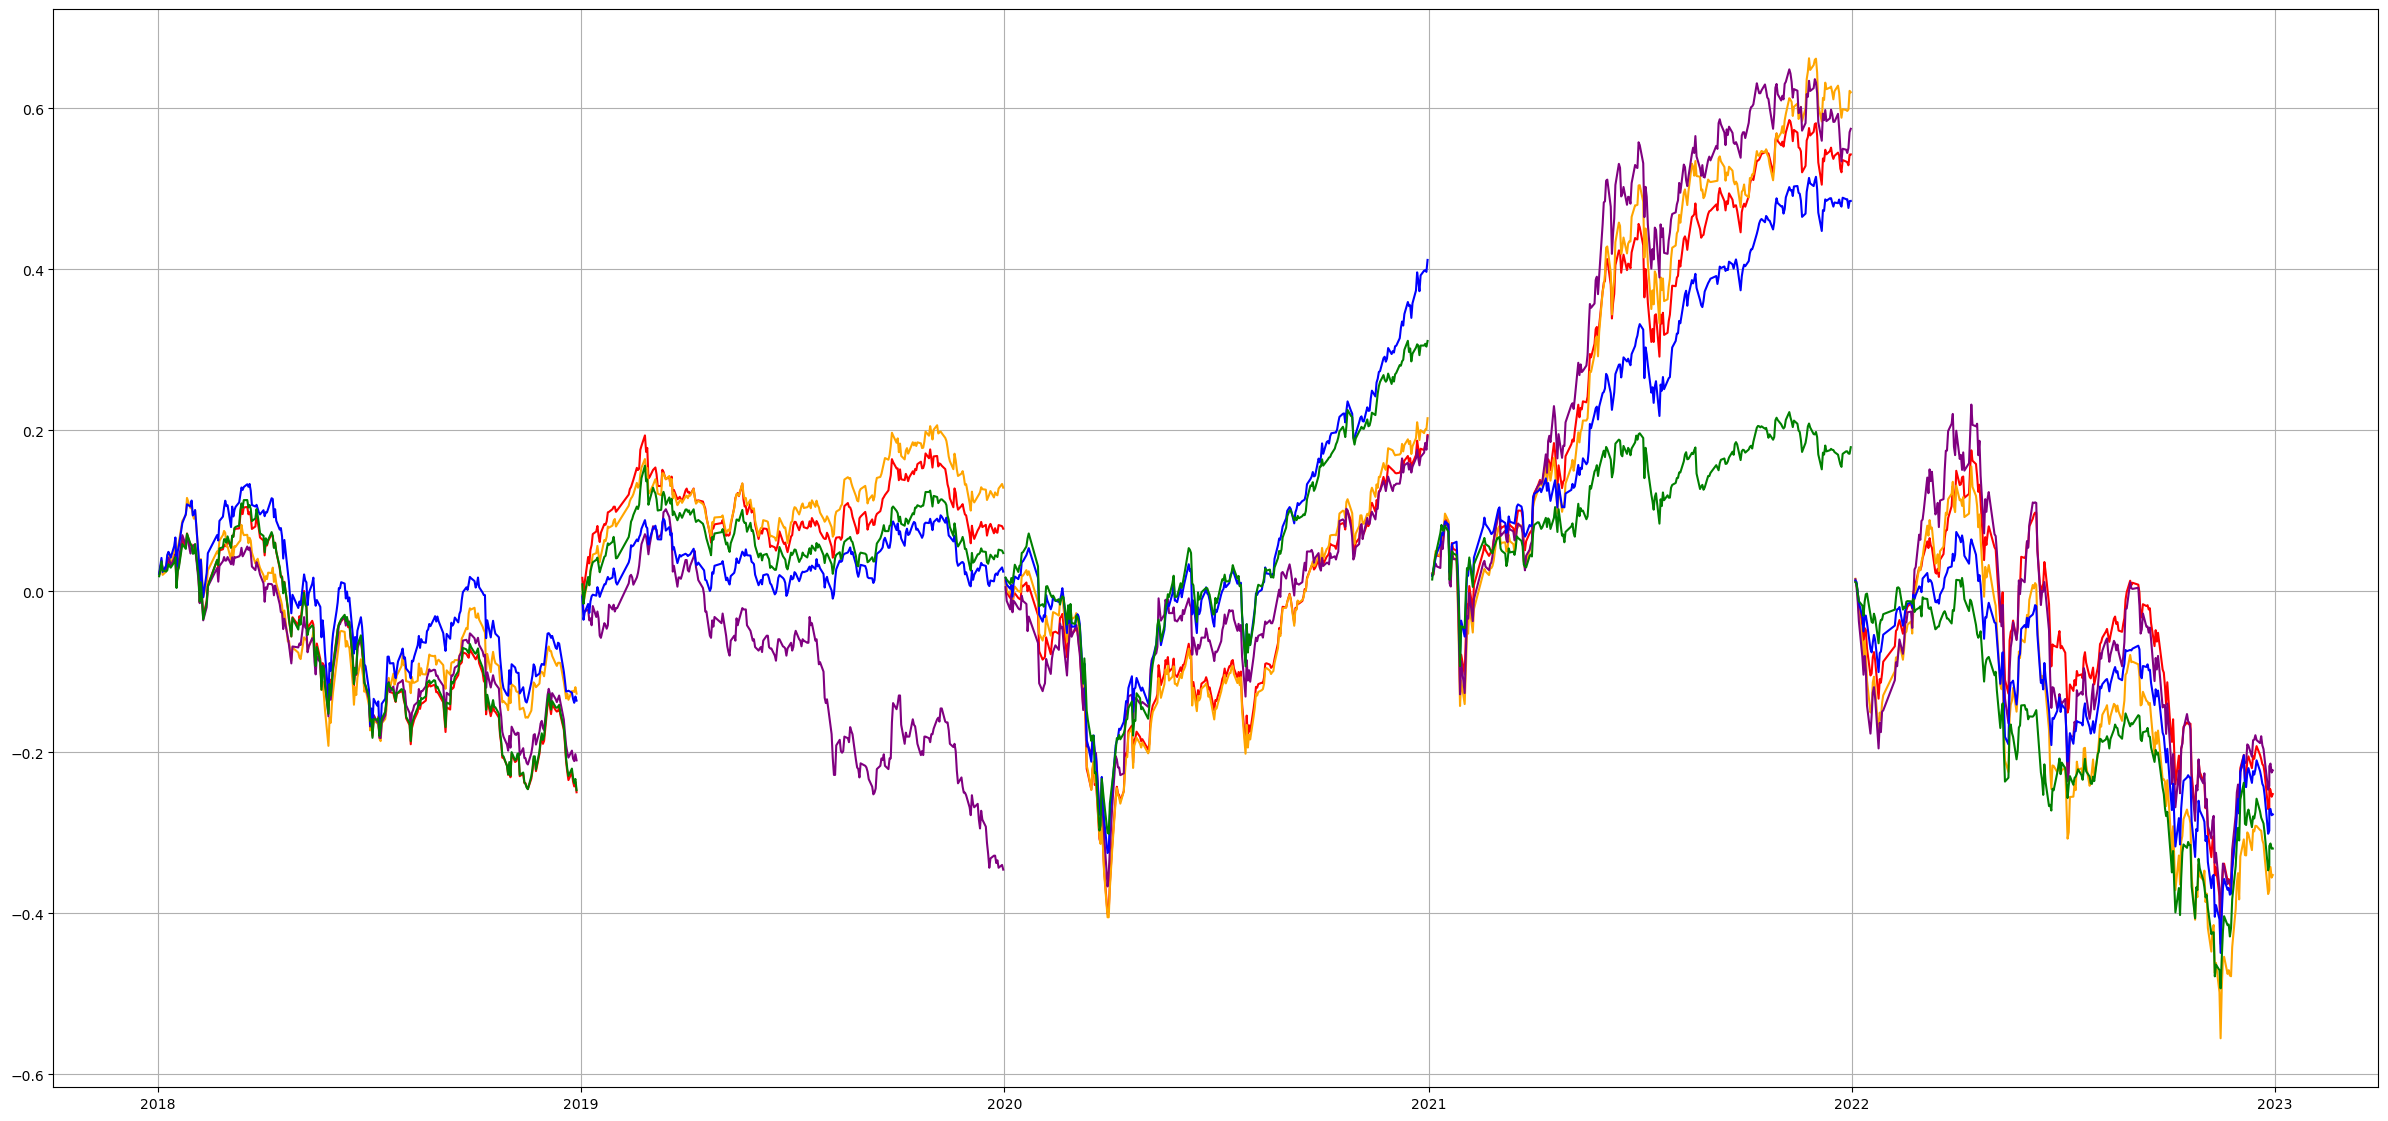

In [29]:
data_back = {'Danh mục': ['BL', 'BL_view', 'MPT', 'EQ', 'Market Value']}
back_test_mean = pd.DataFrame(data_back)
back_test_vol = pd.DataFrame(data_back)
back_test_sharpe = pd.DataFrame(data_back)
year_lst = [2017, 2018, 2019, 2020, 2021, 2022]

data = {'Mã CK': ['MWG', 'SSI', 'REE', 'FPT', 'VNM', 'HPG', 'DPM', 'CTG']}
weight_three_BL = pd.DataFrame(data)
weight_three_BL_view = pd.DataFrame(data)
weight_three_MPT = pd.DataFrame(data)

plt.figure(figsize=(30, 14))
show_legend = True

# Tính trọng số đều
w_eq = np.array([1/len(name_assets_lst) for i in range(0,num_assets)]).reshape(-1,1)
# Ma trận q (BL_View)
q_single = q.drop(columns=['year']).to_numpy().reshape(1, -1).T
for year in year_lst:
    # Ma trận hiệp phương sai cho năm {year}
    log_ret_cov_single = log_ret_cov.loc[year].to_numpy()
    # Trọng số thị trường năm {year}
    w_thi_truong_single = w_thi_truong.loc[w_thi_truong['year'] == year].drop\
                            (columns=['year']).to_numpy().T
    # Lợi nhuận kỳ vọng năm {year}
    log_ret_mean_single = log_ret_mean.loc[year].to_numpy().reshape(1, -1).T
    # Lợi nhuận kỳ vọng 3 tháng cuối năm {year}
    log_ret_near_mean_single = log_ret_near_mean.loc[year].to_numpy().reshape(1, -1).T
    # Lãi suất phi rủi ro năm {year}
    r_f_single = r_f.loc[r_f['Năm'] == year].drop(columns=['Năm']).to_numpy()
    # Tính hệ số né tránh rủi ro
    delta = ((np.dot(w_thi_truong_single.T, log_ret_mean_single)) - \
            r_f_single)/np.dot(np.dot(w_thi_truong_single.T, log_ret_cov_single),\
            w_thi_truong_single)
    # Tính lợi nhuận kỳ vọng tiên nghiệm (prior expected return)
    pi = delta * np.dot(log_ret_cov_single, w_thi_truong_single)
    
    #--- BL ---
    # Ma trận quan điểm tính theo quá khứ năm {year}
    P = np.identity(num_assets)
    Q = log_ret_near_mean_single
    Omega = np.identity(len(P))
    for i in range(len(P)):
        P_i = P[i]
        omg_i = tau * np.dot(np.dot(P_i, log_ret_cov_single), P_i.T) 
        Omega[i,i]= omg_i
    # Tính vectơ lợi nhuận kết hợp mới
    post_ret = np.dot(np.linalg.inv(np.linalg.inv(tau * log_ret_cov_single)\
                + np.dot(np.dot(P.T, np.linalg.inv(Omega)), P)),\
                np.dot(np.linalg.inv(tau * log_ret_cov_single), pi) +\
                np.dot(np.dot(P.T, np.linalg.inv(Omega)), Q))
    w_bl = np.dot(np.linalg.inv(delta * log_ret_cov_single), post_ret)
    w_bl = np.clip(w_bl, 0, None)
    w_bl = w_bl/ np.sum(w_bl)
    
    #--- BL_View ---
    # Ma trận quan điểm cá nhân năm {year}
    q_t = np.array(q.loc[year]).reshape(1, -1)
    P_view_single = P_view.loc[P_view['year'] == year].drop(columns=['year']).to_numpy()
    Omega_view_single = np.identity(len(P_view_single))
    for i in range(len(P_view_single)):
        P_view_single_i = P_view_single[i]
        omg_view_single_i = tau * np.dot(np.dot(P_view_single_i, log_ret_cov_single),\
                            P_view_single_i.T)
        Omega_view_single[i,i]= omg_view_single_i
    # Tính vectơ lợi nhuận kết hợp mới
    post_ret_view_single = np.dot(np.linalg.inv(np.linalg.inv(tau * log_ret_cov_single)\
                        +np.dot(np.dot(P_view_single.T,np.linalg.inv(Omega_view_single)),\
                        P_view_single)),np.dot(np.linalg.inv(tau*log_ret_cov_single), pi)\
                        +np.dot(np.dot(P_view_single.T,np.linalg.inv(Omega_view_single)),\
                        q_t))
    w_bl_view_single = np.dot(np.linalg.inv(delta*log_ret_cov_single),post_ret_view_single)
    w_bl_view_single = np.clip(w_bl_view_single, 0, None)
    w_bl_view_single = w_bl_view_single/ np.sum(w_bl_view_single)
    
     #--- MPT ---
    log_ret_mean_single_mpt = log_ret_mean_single.flatten()
    def objective_function(x, delta, log_ret_mean_single_mpt, log_ret_cov_single):
        return - (x.T @ log_ret_mean_single_mpt - delta/2 * x.T @ log_ret_cov_single @ x)
    # Gradient của hàm mục tiêu
    def gradient_objective_function(x, delta, log_ret_mean_single_mpt, log_ret_cov_single):
        return - (log_ret_mean_single_mpt - delta * log_ret_cov_single @ x)
    # Ràng buộc trọng số 
    constraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = [(0, 1) for _ in range(len(log_ret_mean_single))]
    x0 = np.array([1/len(log_ret_mean_single)] * len(log_ret_mean_single))
    # Tối ưu hóa
    result = minimize(objective_function, x0, args=(delta, log_ret_mean_single_mpt,\
                log_ret_cov_single),method='SLSQP',options={'ftol':1e-200,'disp':False},\
                bounds=bounds, constraints=constraint, jac=gradient_objective_function)
    w_mpt = result.x.reshape(-1, 1)
    
    new_col = f'BL Năm {year+1}'
    weight_three_BL[new_col] = [w_bl[0,0], w_bl[1,0], w_bl[2,0], w_bl[3,0], w_bl[4,0],\
                                w_bl[5,0], w_bl[6,0], w_bl[7,0]]
    weight_three_BL_view[new_col] = [w_bl_view_single[0,0], w_bl_view_single[1,0], w_bl_view_single[2,0],\
                                     w_bl_view_single[3,0], w_bl_view_single[4,0], w_bl_view_single[5,0],\
                                     w_bl_view_single[6,0], w_bl_view_single[7,0]]
    weight_three_MPT[new_col] = [w_mpt[0,0], w_mpt[1,0], w_mpt[2,0], w_mpt[3,0], w_mpt[4,0],\
                                w_mpt[5,0], w_mpt[6,0], w_mpt[7,0]]
    
    #--- BACKTEST LỢI NHUẬN LŨY TÍCH ---
    # Chọn lùi lợi nhuận hàng ngày về 1 năm để test
    log_ret_backtest = log_ret[log_ret['time'].dt.year == year + 1] 
    #Lợi nhuận lũy tích mô hình BL
    luy_tich_ln_backtest = log_ret_backtest.drop(columns=['time', 'year']).dot(w_bl)
    luy_tich_ln_backtest = luy_tich_ln_backtest.cumsum()
    luy_tich_ln_backtest.insert(loc=0, column='time', value=log_ret_backtest['time'])
    #Lợi nhuận lũy tích trọng số đều
    trong_so_deu = log_ret_backtest.drop(columns=['time', 'year']).dot(w_eq)
    trong_so_deu = trong_so_deu.cumsum()
    trong_so_deu.insert(loc=0, column='time', value=log_ret_backtest['time'])
    #Lợi nhuận lũy tích trọng thị trường
    trong_so_TT = log_ret_backtest.drop(columns=['time', 'year']).dot(w_thi_truong_single)
    trong_so_TT = trong_so_TT.cumsum()
    trong_so_TT.insert(loc=0, column='time', value=log_ret_backtest['time'])
    #Lợi nhuận lũy tích trọng số view cá nhân
    trong_so_ca_nhan = log_ret_backtest.drop(columns=['time', 'year']).dot(w_bl_view_single)
    trong_so_ca_nhan = trong_so_ca_nhan.cumsum()
    trong_so_ca_nhan.insert(loc=0, column='time', value=log_ret_backtest['time'])
    #Lợi nhuận lũy tích trọng số MPT
    trong_so_mpt = log_ret_backtest.drop(columns=['time', 'year']).dot(w_mpt)
    trong_so_mpt = trong_so_mpt.cumsum()
    trong_so_mpt.insert(loc=0, column='time', value=log_ret_backtest['time'])
    
    #--- BACKTEST LỢI NHUẬN ---
    #Vẽ đồ thị lợi nhuận lũy tích
    plt.grid(True)
    plt.plot(luy_tich_ln_backtest['time'],luy_tich_ln_backtest.drop(columns=['time']),\
            color='red', label='BL' if show_legend else '')
    plt.plot(trong_so_ca_nhan['time'],trong_so_ca_nhan.drop(columns =['time']),color='orange',\
            label='BL_view' if show_legend else '')
    plt.plot(trong_so_mpt['time'],trong_so_mpt.drop(columns = ['time']), color='purple',\
            label='MPT' if show_legend else '')
    plt.plot(trong_so_deu['time'],trong_so_deu.drop(columns = ['time']), color='blue',\
            label='EQ' if show_legend else '')
    plt.plot(trong_so_TT['time'],trong_so_TT.drop(columns = ['time']), color='green',\
            label='Market Value' if show_legend else '')
    
    #--- BACKTEST ĐỘ BIẾN ĐỘNG ---
    if year == 2022:
        break
    # Ma trận hiệp phương sai năm {year + 1}
    log_ret_cov_year_1 = log_ret_cov.loc[year+1].to_numpy()
    # Tính độ biến động
    mpt_volatility = np.sqrt(np.dot(np.dot(w_mpt.T, log_ret_cov_year_1), w_mpt))
    eq_volatility = np.sqrt(np.dot(np.dot(w_eq.T, log_ret_cov_year_1), w_eq))
    bl_volatility = np.sqrt(np.dot(np.dot(w_bl.T, log_ret_cov_year_1), w_bl))
    bl_view_volatility = np.sqrt(np.dot(np.dot(w_bl_view_single.T,log_ret_cov_year_1),
                        w_bl_view_single))
    w_tt_volatility = np.sqrt(np.dot(np.dot(w_thi_truong_single.T,log_ret_cov_year_1),
                        w_thi_truong_single))
    
    #--- BACKTEST SHARPE RATIO ---
    # Lợi nhuận kỳ vọng năm {year+1}
    log_ret_mean_backtest = log_ret_mean.loc[year+1].to_numpy().reshape(1, -1).T
    #Lợi nhuận kỳ vọng {year+1}
    bl_backtest_mean = np.dot(w_bl.T, log_ret_mean_backtest)
    eq_backtest_mean = np.dot(w_eq.T, log_ret_mean_backtest)
    tt_backtest_mean = np.dot(w_thi_truong_single.T, log_ret_mean_backtest)
    bl_view_backtest_mean = np.dot(w_bl_view_single.T, log_ret_mean_backtest)
    mpt_backtest_mean = np.dot(w_mpt.T, log_ret_mean_backtest)
    # Lãi suất phi rủi ro năm {year+1}
    r_f_backtest = r_f.loc[r_f['Năm'] == year+1].drop(columns=['Năm']).to_numpy()
    # Sharpe Ratio 
    sharpe_bl = ((np.dot(w_bl.T, log_ret_mean_backtest)) - r_f_backtest) / bl_volatility
    sharpe_bl_view = ((np.dot(w_bl_view_single.T, log_ret_mean_backtest))-r_f_backtest)/\
                        bl_view_volatility
    sharpe_eq = ((np.dot(w_eq.T, log_ret_mean_backtest)) - r_f_backtest) / eq_volatility
    sharpe_tt = ((np.dot(w_thi_truong_single.T, log_ret_mean_backtest)) - r_f_backtest)/\
                    w_tt_volatility
    sharpe_mpt = ((np.dot(w_mpt.T, log_ret_mean_backtest))-r_f_backtest)/mpt_volatility
    
    #--- IN KẾT QUẢ BACKTEST ---
    new_col = f'Năm {year+1}'
    back_test_mean[new_col] = [re.sub('( \[|\[|\])', '', str(bl_backtest_mean)),\
                           re.sub('( \[|\[|\])', '', str(bl_view_backtest_mean)),\
                           re.sub('( \[|\[|\])', '', str(mpt_backtest_mean)),\
                           re.sub('( \[|\[|\])', '', str(eq_backtest_mean)),\
                           re.sub('( \[|\[|\])', '', str(tt_backtest_mean))]
    back_test_vol[new_col] = [re.sub('( \[|\[|\])', '', str(bl_volatility)),\
                           re.sub('( \[|\[|\])', '', str(bl_view_volatility)),\
                           re.sub('( \[|\[|\])', '', str(mpt_volatility)),\
                           re.sub('( \[|\[|\])', '', str(eq_volatility)),\
                           re.sub('( \[|\[|\])', '', str(w_tt_volatility))]
    back_test_sharpe[new_col] = [re.sub('( \[|\[|\])', '', str(sharpe_bl)),\
                           re.sub('( \[|\[|\])', '', str(sharpe_bl_view)),\
                           re.sub('( \[|\[|\])', '', str(sharpe_mpt)),\
                           re.sub('( \[|\[|\])', '', str(sharpe_eq)),\
                           re.sub('( \[|\[|\])', '', str(sharpe_tt))]   
print('Tỷ suất sinh lợi kỳ vọng')
print(back_test_mean)
print('\nĐộ biến động')
print(back_test_vol)
print('\nTỷ lệ Sharpe')
print(back_test_sharpe)
print('\nTỷ suất sinh lợi lũy tích')